# Artigo Científico: Estudo de Resistência de Concreto contra ataques de água e sulfáticos

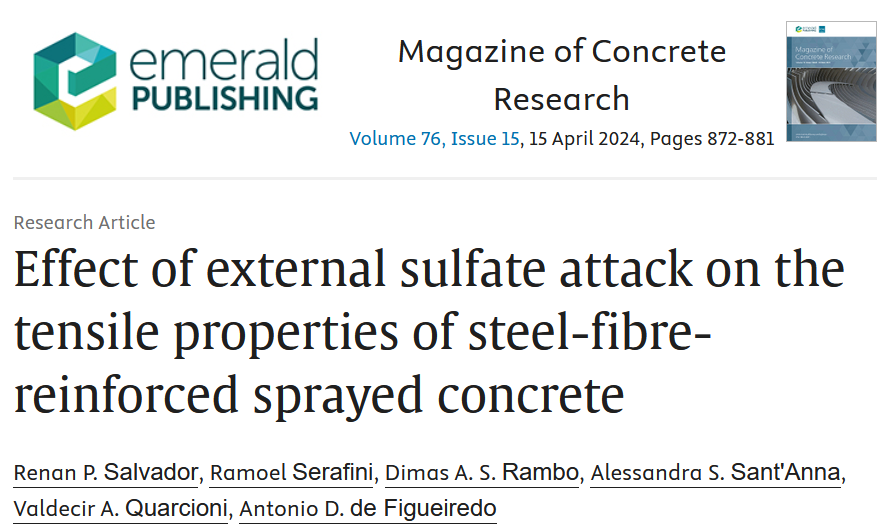

**Importância de investigar a resistência de concretos reforçados com fibras contra ataques sulfáticos e de água**: Concretos em ambientes agressivos, como solos e águas contendo sulfatos, podem sofrer deterioração devido a reações químicas que causam expansão e fissuras. Isso compromete a integridade estrutural ao longo do tempo. Reforçar o concreto com fibras melhora a resistência ao fissuramento, tornando-o mais durável diante de ataques químicos e ciclos de umidade e secagem. O estudo da resistência a esses ataques é essencial para garantir a durabilidade de estruturas em condições adversas.

**Microscopia Eletrônica de Varredura (MEV)**: A MEV é uma técnica que utiliza um feixe de elétrons para analisar a superfície de materiais em altíssima resolução. Ela é usada para estudar a microestrutura do concreto, permitindo observar como os ataques sulfáticos e de água afetam as fibras e a matriz do concreto, revelando fissuras e áreas danificadas de maneira detalhada.



# Importação e Tratamento de Dados

In [ ]:
!pip install openpyxl

import pandas as pd
import openpyxl

# URL do arquivo Excel no GitHub
url = 'https://github.com/tiagomarum/aulas_ds/raw/main/Dados_Dispersao_ArtigoSulfato_tratado.xlsx'

# Importar o arquivo Excel usando pandas
df = pd.read_excel(url)

# Mostrar as primeiras linhas do DataFrame
df.head()


,ID,Meio,Pt,"P0,5m","P1,5m","P2,5m","P3,5m",Unidade
0,CP1,Agua,14.289017,2.011499,0.972898,0.847980,0.735464,MPa.m3/kg
1,CP2,Agua,11.968974,2.372378,1.452072,1.137751,0.864609,MPa.m3/kg
2,CP3,Agua,9.580620,1.166679,0.555839,0.414537,0.290218,MPa.m3/kg
3,CP4,Agua,8.378407,1.367838,0.613408,0.523690,0.422420,MPa.m3/kg
4,CP5,Agua,7.128857,1.661202,1.030815,0.861964,0.807123,MPa.m3/kg


In [ ]:
# Nome das colunas
print('Colunas no nome original: ',df.columns)

# Alterando
df=df.rename(columns={'Pt':'p0','P0,5m':'p05m','P1,5m':'p15m',
                   'P2,5m':'p25m','P3,5m':'p35m'})

print('Colunas com nome tratados',df.columns)


Colunas no nome original:  Index(['ID', 'Meio', 'Pt', 'P0,5m', 'P1,5m', 'P2,5m', 'P3,5m', 'Unidade'], dtype='object')
Colunas com nome tratados Index(['ID', 'Meio', 'p0', 'p05m', 'p15m', 'p25m', 'p35m', 'Unidade'], dtype='object')


In [ ]:
import pandas as pd
import openpyxl
import numpy as np

# Calculando a média, desvio padrão, cv, desvio médio e amplitude para cada tipo de Meio
def calc_stats(df, meio):
    df_filtered = df[df['Meio'] == meio]

    # Calculando as estatísticas
    stats = pd.DataFrame()
    stats['Média'] = df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].mean()
    stats['Desvio Padrão'] = df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].std()
    stats['CV (%)'] = (stats['Desvio Padrão'] / stats['Média']) * 100
    stats['n'] = df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].count()
    #The mad() method was replaced by a custom calculation for mean absolute deviation.
    stats['Desvio Médio (MAD)'] = df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].sub(df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].mean()).abs().mean()
    stats['Amplitude'] = df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].max() - df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].min()
    stats['DIQ'] = df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].quantile(0.75) - df_filtered[['p0', 'p05m', 'p15m', 'p25m', 'p35m']].quantile(0.25)

    # Transpondo a tabela
    stats = stats.T

    # Renomeando as colunas
    stats.columns = ['p0', 'p05m', 'p15m', 'p25m', 'p35m']

    # Arredondando para duas casas decimais
    stats = stats.round(2)

    return stats

# Calculando as estatísticas para Água
stats_agua = calc_stats(df, 'Agua')

# Calculando as estatísticas para Sulfato
stats_sulfato = calc_stats(df, 'Sulfato')

# Exibindo as tabelas
print("Estatísticas para Água:")
print(stats_agua)

print("\nEstatísticas para Sulfato:")
print(stats_sulfato)


Estatísticas para Água:
                       p0   p05m   p15m   p25m   p35m
Média                7.06   1.82   1.06   0.81   0.64
Desvio Padrão        3.45   0.52   0.41   0.34   0.26
CV (%)              48.78  28.77  38.85  42.13  39.74
n                   12.00  12.00  12.00  12.00  12.00
Desvio Médio (MAD)   2.67   0.42   0.29   0.23   0.20
Amplitude           11.26   1.67   1.54   1.26   0.89
DIQ                  3.86   0.66   0.37   0.26   0.32

Estatísticas para Sulfato:
                       p0   p05m   p15m   p25m   p35m
Média                7.01   1.86   1.08   0.80   0.65
Desvio Padrão        2.35   0.81   0.50   0.38   0.33
CV (%)              33.49  43.72  46.50  47.84  50.32
n                   11.00  11.00  11.00  11.00  11.00
Desvio Médio (MAD)   1.94   0.64   0.38   0.28   0.24
Amplitude            7.25   2.59   1.73   1.39   1.11
DIQ                  3.51   0.95   0.63   0.45   0.36


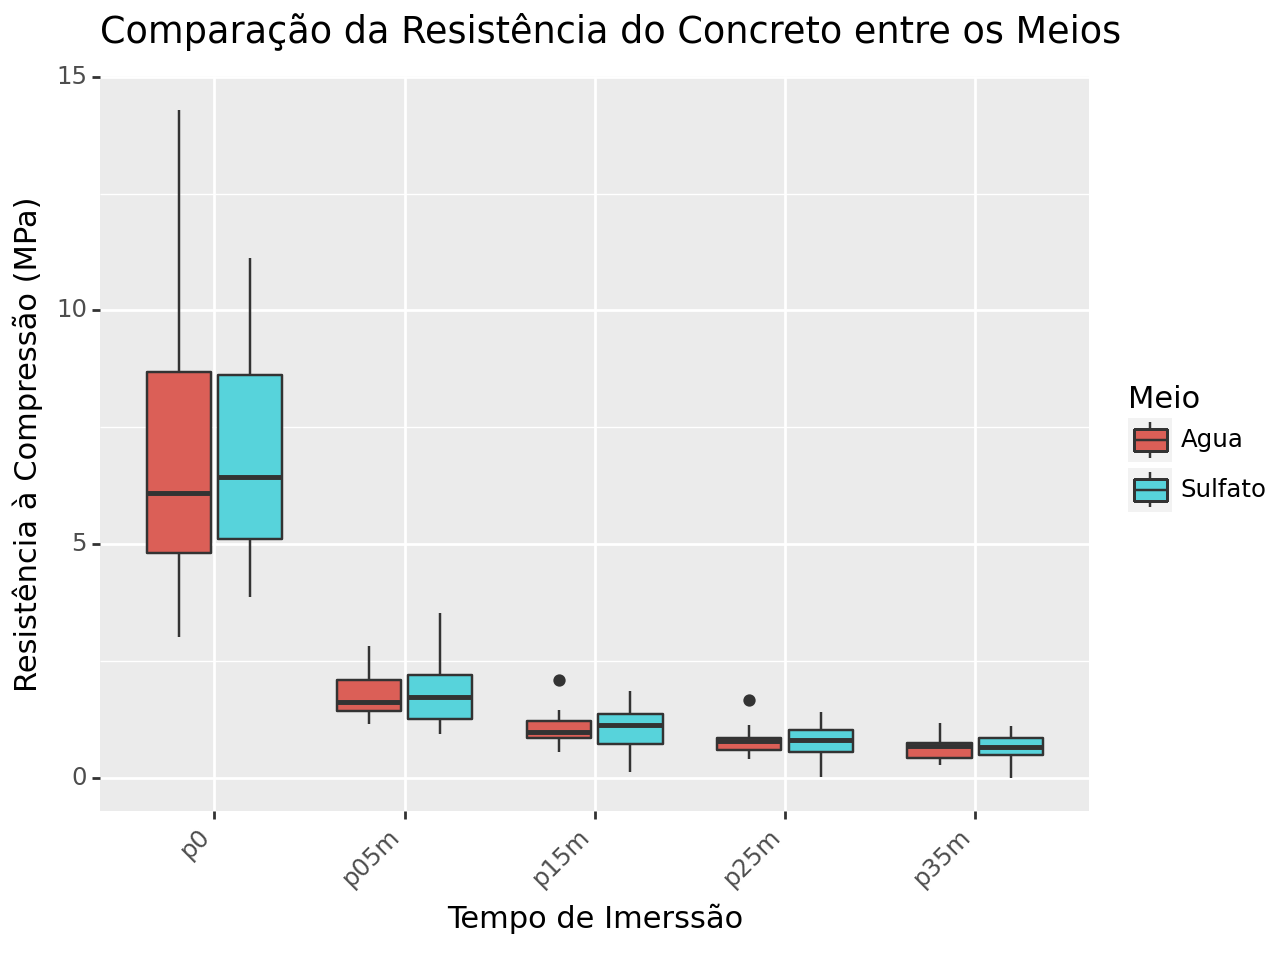

<Figure Size: (640 x 480)>

In [ ]:
# prompt: Me ajude a criar um gráfico de boxplot com o plotnine para comparar cada "p" entre os Meios

from plotnine import *

# Transformar o DataFrame para o formato longo
df_long = df.melt(id_vars=['Meio'],
                  value_vars=['p0', 'p05m', 'p15m', 'p25m', 'p35m'],
                  var_name='Tempo',
                  value_name='Resistência')

# Criar o gráfico de boxplot
(ggplot(df_long, aes(x='Tempo', y='Resistência', fill='Meio')) +
  geom_boxplot() +
  labs(title='Comparação da Resistência do Concreto entre os Meios',
       x='Tempo de Imerssão',
       y='Resistência à Compressão (MPa)',
       fill='Meio') +
  theme(axis_text_x=element_text(rotation=45, hjust=1))
)
